Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0763 - val_loss: 0.0473
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0410 - val_loss: 0.0358
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0330 - val_loss: 0.0299
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0284 - val_loss: 0.0263
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0254 - val_loss: 0.0238
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0232 - val_loss: 0.0220
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0216 - val_loss: 0.0205
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0203 - val_loss: 0.0194
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0194 - val_loss: 0.0187
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0187 - val_loss: 0.0181

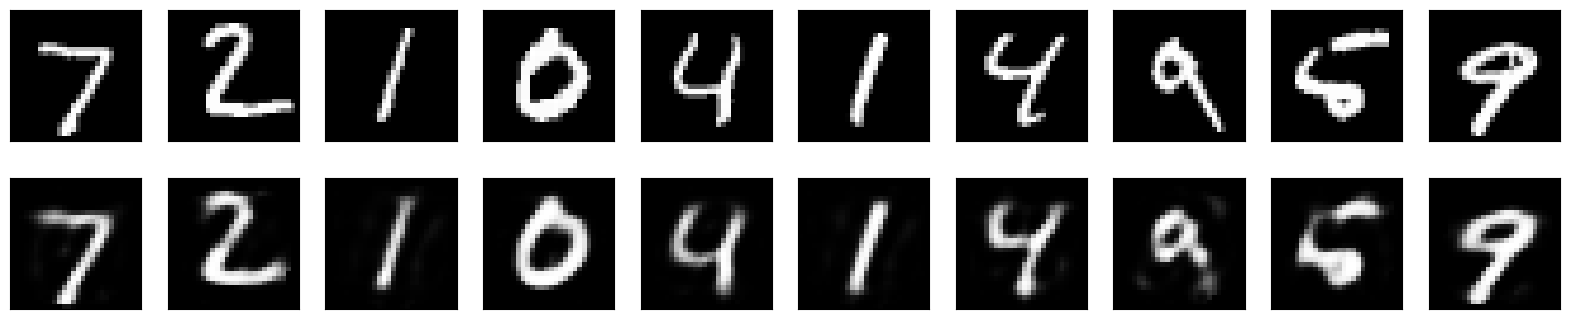

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Define the autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # The number of neurons in the encoding layer

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1e-4))(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Create an encoder model to extract encoded representations
encoder = Model(input_img, encoded)

# Encode and decode some test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
